<a href='https://akademie.datamics.com/kursliste/'>![title](bg_datamics_top.png)</a>
___
<center><em>© Datamics</em></center>
<center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em></center>

# Keras Syntax Grundlagen

In TensorFlow 2.0 stellt Keras jetzt die primäre API. Lasst uns ein einfaches Regressionsprojekt betrachten, um die Grundlagen der Keras-Syntax und des hinzufügens von Layern zu erklären.

## Der Datensatz

Zum Erlernen der wichtigsten Grundlagen der Syntax von Keras werden wir einen einfachen Satz falscher Daten verwenden, um dann in späteren Abschnitten mit echten Datensätzen und Featureerkennung zu arbeiten! Lasst uns nun zuerst die Syntax von TensorFlow 2.0 betrachten.

Lasst uns so tun als beinhalte dieser Datensatz Features (Eigenschaften) seltener Edelsteine, mit zwei Features und einem Verkaufspreis. Unser Ziel ist es, den Verkaufspreis eines gerade ausgegrabenen Edelsteines vorherzusagen, um ihn zu einem fairen Preis anbieten zu können.

### Datensatz laden

In [58]:
import pandas as pd

In [59]:
df = pd.read_csv('./fake_reg.csv')

In [60]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### Datensatz erkunden

Lasst uns einen schnellen Blick auf den Datensatz werfen: gibt es eine starke Korrelation zwischen den Features und dem "Preis" der generierten Daten?

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

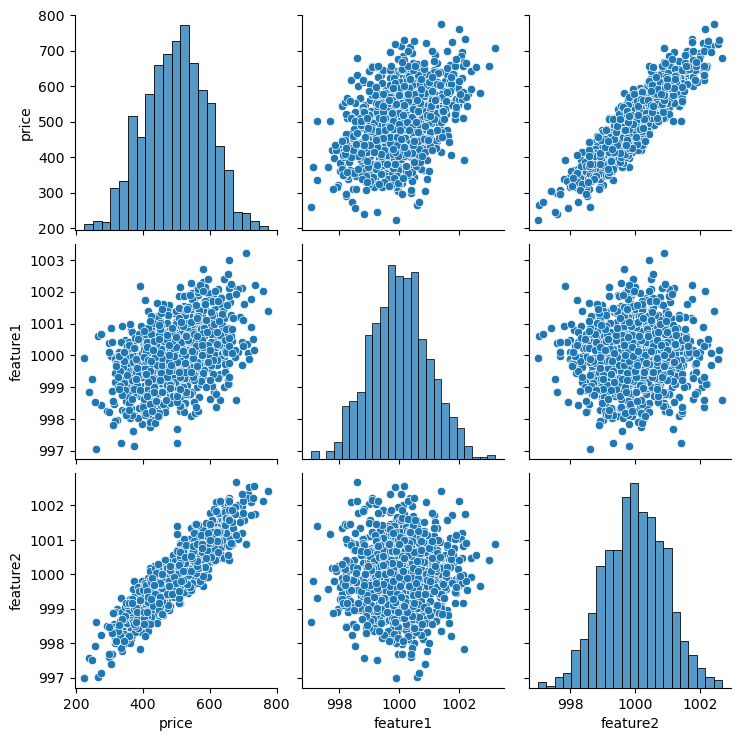

In [62]:
sns.pairplot(df)

Du kannst die Daten weiter visualisieren, da die Daten aber generiert sind, werden wir uns im Detail erst in späteren Abschnitten des Kurses mit Featureerkennug und Datenexploration beschäftigen!

### Test/Train Aufteilung

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Convert Pandas to Numpy for Keras

# Features
X = df[['feature1','feature2']].values

# Label
y = df['price'].values

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [65]:
X_train.shape

(700, 2)

In [66]:
X_test.shape

(300, 2)

In [67]:
y_train.shape

(700,)

In [68]:
y_test.shape

(300,)

## Normalisierung und Skalierung der Daten

Wir skalieren die Daten der Features.

[Weshalb das Label nicht skaliert werden muss](https://stats.stackexchange.com/questions/111467/is-it-necessary-to-scale-the-target-value-in-addition-to-scaling-features-for-re)

In [69]:
from sklearn.preprocessing import MinMaxScaler

In [70]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing.data:

class MinMaxScaler(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  MinMaxScaler(feature_range=(0, 1), copy=True)
 |  
 |  Transforms features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  The transformation is calculated as::
 |  
 |      X_scaled = scale * X + min - X.min(axis=0) * scale
 |      where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters


In [71]:
scaler = MinMaxScaler()

In [72]:
# Notice to prevent data leakage from the test set, we only fit our scaler to the training set

In [73]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [74]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow 2.0 Syntax


## Import Optionen

Es gibt verschiedene Wege zum Import von Keras in TensorFlow (dies ist stark abhängig von persöhnlichen Vorlieben, bitte verwende die Methode, die dir am besten gefällt). Wir verwenden die Methode aus der **offiziellen TF Dokumentation**.

In [75]:
import tensorflow as tf

In [76]:
from tensorflow.keras import Sequential

In [77]:
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(*args, **kwargs)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequentia

## Ein Modell erzeugen

Die TF2 Keras API bietet zwei Methoden zum erzeugen eines Modells. Übergib entweder eine Liste aller Layers auf einmal oder füge sie nacheinander hinzu.

Wir zeigen beide Methoden (verwende diejenige, die dir besser gefällt).

In [78]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation

### Modell - als eine Liste von Layern

In [79]:
model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

### Modell - Layer nach und nach hinzufügen

In [80]:
model = Sequential()

model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

Lasst uns fortfahren und ein einfaches Modell erst bauen und es dann, nach der Definition des Solvers (Bewertungsfunktion), kompilieren.

In [81]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

# Final output node for prediction
model.add(Dense(1))

model.compile(optimizer='rmsprop',loss='mse')

### Optimierer (Optimizer) und loss (Kostenfunktion)

Beachte, welche Art von Problem du lösen möchtest:

    # Für multiklassen-Klassifizierungsprobleme
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Für binäre Klassifizierungsprobleme
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # Für ein  Regressionsproblem mit gemittelter quadratischer Abweichung (mean squared error)
    model.compile(optimizer='rmsprop',
                  loss='mse')

# Training

Es folgen einige gebräuchliche Definitionen, die nötig sind zum Verständnis der korrekten Verwendung von Keras:

* Sample (Stichprobe): ein Element eines Datensatzes.
    * Beispiel: ein Bild ist ein Sample eines Bilderkennungsmodells
    * Beispiel: eine Audiodatei ist ein Sample eines Spracherkennungsmodells
* Batch (Stapel): eine Menge von N Samples. Die Samples eines Batch werden unabhängig und prallel prozessiert. Im Training führt ein Batch zu genau einem Update des Modells. Ein Batch bildet die Verteilung der Eingabedaten besser ab als ein einzelnes Bild. Je größer das Batch, desto besser die Abbildung; das Prozessieren des Batches dauert aber entsprechend länger und führt nur zu einem Update. Für die Evaluierung und Vorhersagen ist es empfehlenswert, die maximale vom RAM erlaubte Batchgröße zu wählen (dies ermöglicht eine schnellere Evaluierung und Vorhersage).
* Epoche (Epoch): ein willkürlicher Abschnitt, allgemein definiert als "ein Durchlauf des gesamten Datensatzes", wird verwendet um das Training in verschiedene Phasen aufzuteilen, was hilfreich ist für Logging und periodische Evaluation.
* Wenn validation_data oder validation_split mit den Anpassungsmethoden der Keras-Modelle verwendet werden, wird die Evaluation am Ende jeder Epoche ausgeführt.
* Keras erlaubt es, spezifische  Callbacks zu entwerfen, die am Ende jeder Epoche ausgeführt werden. Beispiele dafür sind Änderungen der Lernrate und Modellcheckpoints (speichern).

In [82]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 1ms/step - loss: 256966.1094
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256790.2656
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256697.1875
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256640.4062
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256595.8438
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256548.0625
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256492.2344
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256425.5938
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256346.2812
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 256255.4688
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 256151.8594
Epoch 12/250
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 1ms/step - loss: 60057.5898
Epoch 96/250
22/22 [==============================] - 0s 994us/step - loss: 55499.6914
Epoch 97/250
22/22 [==============================] - 0s 991us/step - loss: 50970.1328
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 46511.2109
Epoch 99/250
22/22 [==============================] - 0s 2ms/step - loss: 42224.9141
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 38034.3750
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 33968.3672
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 30039.1934
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 26323.5801
Epoch 104/250
22/22 [==============================] - 0s 933us/step - loss: 22793.0684
Epoch 105/250
22/22 [==============================] - 0s 832us/step - loss: 19470.9570
Epoch 106/250
22/22 [==============================] - 0s 882us/

Epoch 190/250
22/22 [==============================] - 0s 1ms/step - loss: 567.0746
Epoch 191/250
22/22 [==============================] - 0s 1ms/step - loss: 551.0606
Epoch 192/250
22/22 [==============================] - 0s 1ms/step - loss: 536.1011
Epoch 193/250
22/22 [==============================] - 0s 1ms/step - loss: 520.6015
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 503.6561
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 486.8444
Epoch 196/250
22/22 [==============================] - 0s 909us/step - loss: 470.8981
Epoch 197/250
22/22 [==============================] - 0s 974us/step - loss: 456.3546
Epoch 198/250
22/22 [==============================] - 0s 900us/step - loss: 439.9887
Epoch 199/250
22/22 [==============================] - 0s 1ms/step - loss: 424.6255
Epoch 200/250
22/22 [==============================] - 0s 1ms/step - loss: 409.5417
Epoch 201/250
22/22 [==============================] - 0s 969us/step -

## Evaluation

Lasst uns die Ergebnisse unsereses Trainings- und Testdatensatzes evaluieren. Wir vergleichen deren Ergebnisse und überprüfen, ob ein Overfitting (Überanpassung) vorliegt.

In [83]:
model.history.history

{'loss': [256966.109375,
  256790.265625,
  256697.1875,
  256640.40625,
  256595.84375,
  256548.0625,
  256492.234375,
  256425.59375,
  256346.28125,
  256255.46875,
  256151.859375,
  256035.046875,
  255904.109375,
  255757.375,
  255593.53125,
  255412.40625,
  255212.1875,
  254989.046875,
  254743.890625,
  254474.015625,
  254178.234375,
  253854.65625,
  253503.453125,
  253122.171875,
  252709.53125,
  252262.421875,
  251777.34375,
  251256.890625,
  250699.84375,
  250099.953125,
  249456.484375,
  248771.015625,
  248033.078125,
  247251.703125,
  246421.28125,
  245537.421875,
  244597.140625,
  243600.4375,
  242549.140625,
  241439.71875,
  240266.015625,
  239028.390625,
  237725.125,
  236350.921875,
  234904.0,
  233390.109375,
  231800.984375,
  230134.171875,
  228402.3125,
  226584.75,
  224693.46875,
  222709.1875,
  220633.671875,
  218488.203125,
  216250.484375,
  213932.359375,
  211513.234375,
  209005.546875,
  206408.703125,
  203716.84375,
  200952.875,


In [84]:
loss = model.history.history['loss']

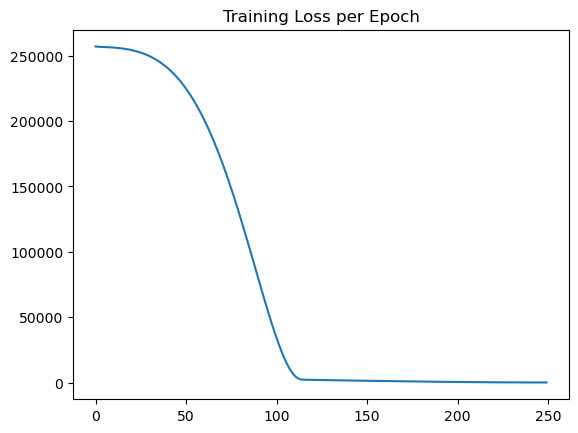

In [85]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

### Vergleiche die finale Evaluation (MSE) des Trainings- und Testdatensatzes

Diese sollten hoffentlich ziemlich nahe beieinander liegen.

In [86]:
model.metrics_names

['loss']

In [87]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [88]:
training_score

34.213314056396484

In [89]:
test_score

35.35373306274414

### Weitere Evaluationen

In [90]:
test_predictions = model.predict(X_test)

10/10 [==============================] - 0s 846us/step


In [91]:
test_predictions

array([[409.21924],
       [620.6481 ],
       [589.74023],
       [572.0377 ],
       [373.8579 ],
       [577.9879 ],
       [517.5964 ],
       [460.52985],
       [549.7372 ],
       [449.1375 ],
       [609.2099 ],
       [546.30206],
       [422.75735],
       [413.1787 ],
       [645.2935 ],
       [439.63657],
       [507.41788],
       [657.70044],
       [659.2431 ],
       [563.62177],
       [341.45847],
       [447.6577 ],
       [387.9641 ],
       [383.42007],
       [565.63135],
       [609.20734],
       [532.6606 ],
       [430.8865 ],
       [652.8008 ],
       [416.9127 ],
       [444.5889 ],
       [486.55466],
       [441.1516 ],
       [678.0892 ],
       [426.70676],
       [422.1178 ],
       [500.5905 ],
       [549.69464],
       [512.01984],
       [401.59494],
       [615.3925 ],
       [419.59033],
       [601.7703 ],
       [447.12994],
       [502.9364 ],
       [577.8439 ],
       [662.99994],
       [490.85385],
       [324.2651 ],
       [487.0533 ],


In [92]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [93]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [94]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [95]:
test_predictions

0      409.219238
1      620.648071
2      589.740234
3      572.037720
4      373.857910
          ...    
295    530.045227
296    519.255249
297    606.955750
298    419.531372
299    415.436096
Length: 300, dtype: float32

In [96]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [97]:
pred_df.columns = ['Test Y','Model Predictions']

In [98]:
pred_df

,Test Y,Model Predictions
0,402.296319,409.219238
1,624.156198,620.648071
2,582.455066,589.740234
3,578.588606,572.037720
4,371.224104,373.857910
...,...,...
295,525.704657,530.045227
296,502.909473,519.255249
297,612.727910,606.955750
298,417.569725,419.531372


Lasst uns das mit den echten Testlabels vergleichen!

<AxesSubplot:xlabel='Test Y', ylabel='Model Predictions'>

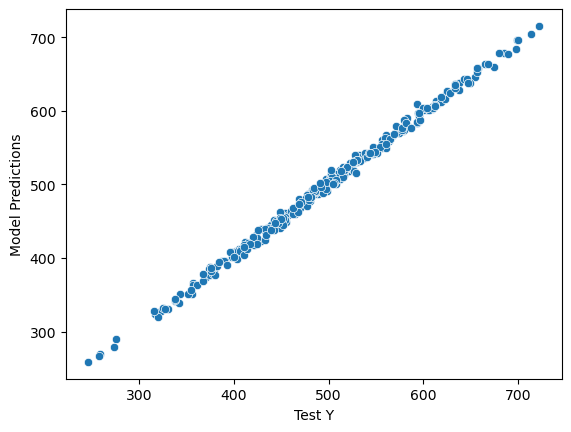

In [99]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [100]:
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']

/opt/miniconda3/envs/tensorflow377/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Error', ylabel='Density'>

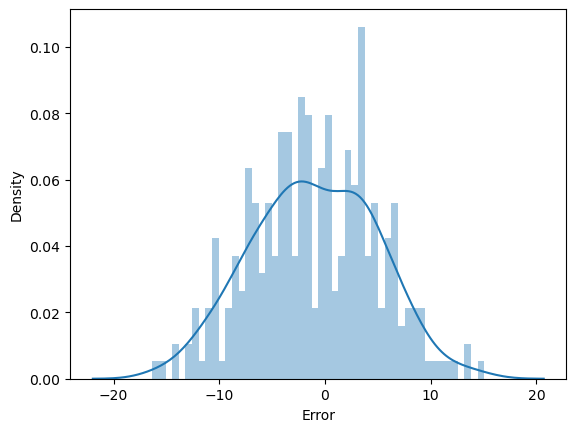

In [101]:
sns.distplot(pred_df['Error'],bins=50)

In [102]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [103]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.869185899777514

In [104]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

35.35374055400913

In [105]:
# Essentially the same thing, difference just due to precision
test_score

35.35373306274414

In [106]:
#RMSE
test_score**0.5

5.945900525802979

# Vorhersage von neuen Daten

Was ist, wenn wir einen neuen Edelstein ausgraben? Welchen Preis sollte er haben? Dies ist der **gleiche** Vorgang wie die Vorhersage neuer Testdaten!

In [107]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [108]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [109]:
import pickle
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))
new_gem = scaler.transform(new_gem)

In [110]:
model.predict(new_gem)

1/1 [==============================] - 0s 19ms/step


array([[425.12085]], dtype=float32)

## Speichern und Laden eines Modelles

In [111]:
from tensorflow.keras.models import load_model

In [112]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

In [113]:
later_model = load_model('my_model.h5')

In [114]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 61ms/step


array([[425.12085]], dtype=float32)

In [115]:
# [[Feature1, Feature2]]
new_gem2 = [[998,1000]]
import pickle
scaler2 = pickle.load(open('scaler.sav', 'rb'))
new_gem2 = scaler2.transform(new_gem2)

# Gut gemacht!

In [116]:
later_model.predict(new_gem2)

1/1 [==============================] - 0s 22ms/step


array([[425.12085]], dtype=float32)